# Sentiment Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('DataAferEDA.csv')
df

,Unnamed: 0,Name,Time,Store,Comment
0,0,macantonioc,25-06-2007,DigInfo,interesting
1,1,donkeyfly69,27-02-2008,DigInfo,not even seem convenient
2,2,donkeyfly69,27-02-2008,DigInfo,not want pay use shopping cart read recipe
3,3,donkeyfly69,27-02-2008,DigInfo,invade privacy way much just get grocery
4,4,donkeyfly69,27-02-2008,DigInfo,not even deep
...,...,...,...,...,...
209573,223255,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back
209574,223256,Mark H.,09-09-2020,Walmart,walmart
209575,223257,Lorna B.,09-09-2021,Walmart,improve site much improve
209576,223258,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...


In [3]:
#Drop Unnamed: 0 column
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Name,Time,Store,Comment
0,macantonioc,25-06-2007,DigInfo,interesting
1,donkeyfly69,27-02-2008,DigInfo,not even seem convenient
2,donkeyfly69,27-02-2008,DigInfo,not want pay use shopping cart read recipe
3,donkeyfly69,27-02-2008,DigInfo,invade privacy way much just get grocery
4,donkeyfly69,27-02-2008,DigInfo,not even deep
...,...,...,...,...
209573,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back
209574,Mark H.,09-09-2020,Walmart,walmart
209575,Lorna B.,09-09-2021,Walmart,improve site much improve
209576,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...


In [4]:
#drop the column which year is 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017
df=df.drop(df[df['Time'].str[-4:]=='2007'].index)
df=df.drop(df[df['Time'].str[-4:]=='2008'].index)
df=df.drop(df[df['Time'].str[-4:]=='2009'].index)
df=df.drop(df[df['Time'].str[-4:]=='2010'].index)
df=df.drop(df[df['Time'].str[-4:]=='2011'].index)
df=df.drop(df[df['Time'].str[-4:]=='2012'].index)
df=df.drop(df[df['Time'].str[-4:]=='2013'].index)
df=df.drop(df[df['Time'].str[-4:]=='2014'].index)
df=df.drop(df[df['Time'].str[-4:]=='2015'].index)
df=df.drop(df[df['Time'].str[-4:]=='2016'].index)
df=df.drop(df[df['Time'].str[-4:]=='2017'].index)
df

,Name,Time,Store,Comment
569,Jenae K.,01-06-2018,Amazon Go,store awesome super cool concept definitley se...
570,Jenae K.,01-06-2018,Amazon Go,scan app enter store grab whatever want shelf ...
571,Jenae K.,01-06-2018,Amazon Go,product shelf sensor know grab item
572,Jenae K.,01-06-2018,Amazon Go,crazy no cashier no line
573,Jenae K.,01-06-2018,Amazon Go,super simple course still worker ensure entran...
...,...,...,...,...
209573,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back
209574,Mark H.,09-09-2020,Walmart,walmart
209575,Lorna B.,09-09-2021,Walmart,improve site much improve
209576,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...


In [5]:
import nltk

# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
df['scores'] = df['Comment'].apply(lambda re: sent_analyzer.polarity_scores(str(re)))
df

,Name,Time,Store,Comment,scores
569,Jenae K.,01-06-2018,Amazon Go,store awesome super cool concept definitley se...,"{'neg': 0.0, 'neu': 0.487, 'pos': 0.513, 'comp..."
570,Jenae K.,01-06-2018,Amazon Go,scan app enter store grab whatever want shelf ...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp..."
571,Jenae K.,01-06-2018,Amazon Go,product shelf sensor know grab item,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
572,Jenae K.,01-06-2018,Amazon Go,crazy no cashier no line,"{'neg': 0.773, 'neu': 0.227, 'pos': 0.0, 'comp..."
573,Jenae K.,01-06-2018,Amazon Go,super simple course still worker ensure entran...,"{'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'comp..."
...,...,...,...,...,...
209573,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
209574,Mark H.,09-09-2020,Walmart,walmart,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
209575,Lorna B.,09-09-2021,Walmart,improve site much improve,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
209576,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [7]:
#calculate the sentiment score for each comment
df['sentiment_score'] = df['Comment'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])

def analysis(score):
  
  polarity = "neutral"

  if(score['compound']>= 0.05):
    polarity = "positive"

  elif(score['compound']<= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  score = sent_analyzer.polarity_scores(text)
  return analysis(score)

# Run the predictions
df["polarity"] = df["Comment"].apply(predict_sentiment)

# Show 5 random rows of the data
df

,Name,Time,Store,Comment,scores,sentiment_score,polarity
569,Jenae K.,01-06-2018,Amazon Go,store awesome super cool concept definitley se...,"{'neg': 0.0, 'neu': 0.487, 'pos': 0.513, 'comp...",0.9136,positive
570,Jenae K.,01-06-2018,Amazon Go,scan app enter store grab whatever want shelf ...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",0.0772,positive
571,Jenae K.,01-06-2018,Amazon Go,product shelf sensor know grab item,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
572,Jenae K.,01-06-2018,Amazon Go,crazy no cashier no line,"{'neg': 0.773, 'neu': 0.227, 'pos': 0.0, 'comp...",-0.7003,negative
573,Jenae K.,01-06-2018,Amazon Go,super simple course still worker ensure entran...,"{'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'comp...",0.7579,positive
...,...,...,...,...,...,...,...
209573,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
209574,Mark H.,09-09-2020,Walmart,walmart,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
209575,Lorna B.,09-09-2021,Walmart,improve site much improve,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.7003,positive
209576,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [40]:
#show posisitve comments of Amazon Fresh
df[df['Store']=='Sobeys'].head(50)


,Name,Time,Store,Comment,scores,sentiment_score,polarity
50710,carrie,20-12-2019,Sobeys,swear think head young,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.0516,negative
50711,carrie,20-12-2019,Sobeys,exist,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
50712,mackenzie,20-12-2019,Sobeys,iâtrade markm canadian iâtrade markve never se...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
50713,Hannah Pretty,20-12-2019,Sobeys,would help social anxiety sm,"{'neg': 0.23, 'neu': 0.405, 'pos': 0.365, 'com...",0.2500,positive
50714,BEdiann,20-12-2019,Sobeys,cash register shopping cart,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
50715,TenseBeats,20-12-2019,Sobeys,convenient,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
50716,Hey,20-12-2019,Sobeys,woah man,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
50717,Lauren Crocker,20-12-2019,Sobeys,yet still plastic bag,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
50728,Dina pooresfahani,21-12-2019,Sobeys,live canada iâtrade markve never see thisðÿðÿ,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
50729,TroySheperds,21-12-2019,Sobeys,tesla make shopping cart,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [22]:
#show random 20 rows of the data
df.sample(20)


,Name,Time,Store,Comment,scores,sentiment_score,polarity
63292,A'Niya Ford,17-10-2020,Amazon Go,anti christ hasnâtrade markt even arrive yet m...,"{'neg': 0.187, 'neu': 0.813, 'pos': 0.0, 'comp...",-0.3182,negative
32361,Paul A.,04-06-2018,Amazon Go,bakery dessert try almost,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
65637,sujit choudhari,20-11-2020,Amazon Go,min bhi bann sakhta tha ye video,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
135129,tracy,15-08-2022,Walmart,walmart employee walmart abq nm academy impoli...,"{'neg': 0.282, 'neu': 0.547, 'pos': 0.171, 'co...",-0.5048,negative
32927,Discordian,27-04-2018,Amazon Go,far know work,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
100959,Mrs Long,07-06-2022,Walmart,roughly worth grocery cart minute manager supe...,"{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'comp...",0.2263,positive
138084,Jackie Sanders,20-09-2019,Walmart,know job,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
68274,Stephanie N Fox,02-07-2021,Walmart,arrive gas station year old caucasian blonde w...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
120434,Jax Cus,17-12-2021,Walmart,no information make several attempt get answer,"{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'comp...",-0.2960,negative
113454,Robin Combs,12-02-2022,Walmart,apparently drop money not realize til self che...,"{'neg': 0.349, 'neu': 0.651, 'pos': 0.0, 'comp...",-0.5994,negative


<AxesSubplot:title={'center':'Sentiment Analysis'}>

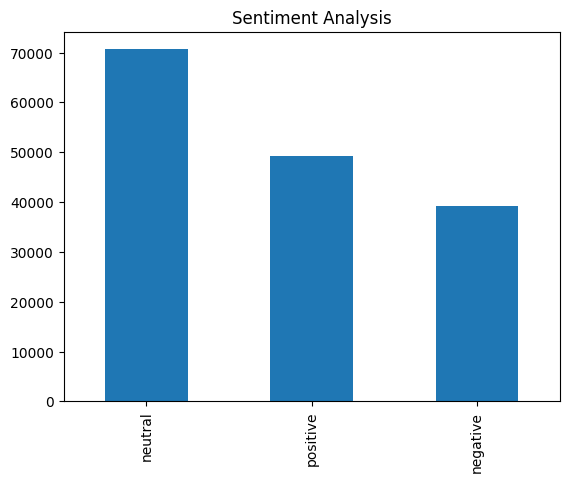

In [9]:
#count the number of positive, negative and neutral comments and plot them
df['polarity'].value_counts().plot(kind='bar', title='Sentiment Analysis')


<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='Store'>

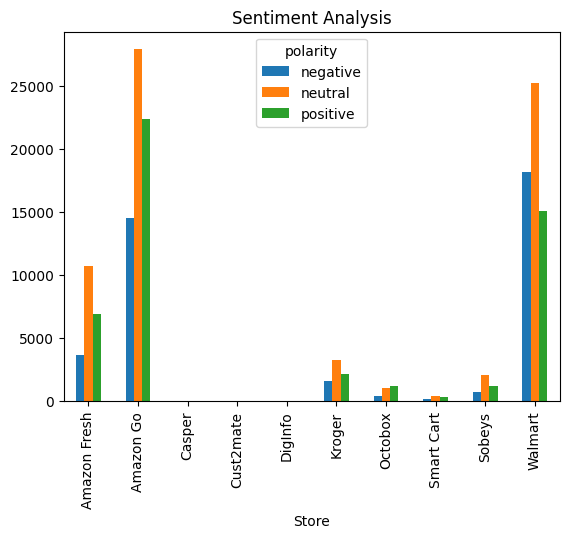

In [10]:
#count the number of positive, negative and neutral comments of each store and plot them
df.groupby('Store')['polarity'].value_counts().unstack().plot(kind='bar', title='Sentiment Analysis')
 


In [11]:
df1=pd.read_csv('dictionary.csv')
df1

,term,aspect
0,store,general
1,grocery,general
2,shop,general
3,shopping,general
4,customer,general
...,...,...
1557,system crash,technology
1558,system problem,technology
1559,system program,technology
1560,technology innovation,technology


In [12]:
#rename data to data intergration
df1.rename(columns={'data':'Data'}, inplace=True)
df1


,term,aspect
0,store,general
1,grocery,general
2,shop,general
3,shopping,general
4,customer,general
...,...,...
1557,system crash,technology
1558,system problem,technology
1559,system program,technology
1560,technology innovation,technology


In [13]:
#rename value of aspect
df1['aspect'].replace({'payment':'Payment and check-out','price':'Price & value','marketing':'Marketing, communications & special offers','technology':'Technology','experience':'Shopping experience','unemployment':'Unemployment','general':'General','privacy':'Privacy & Security issues','product':'Product availability & store design','data':'Data integration & analytics'}, inplace=True)

<AxesSubplot:>

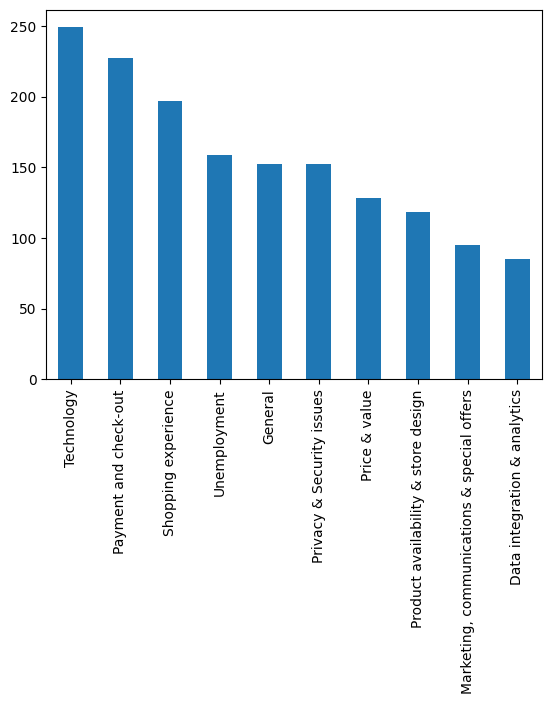

In [14]:
#count the number of each aspect
df1['aspect'].value_counts().plot(kind='bar')


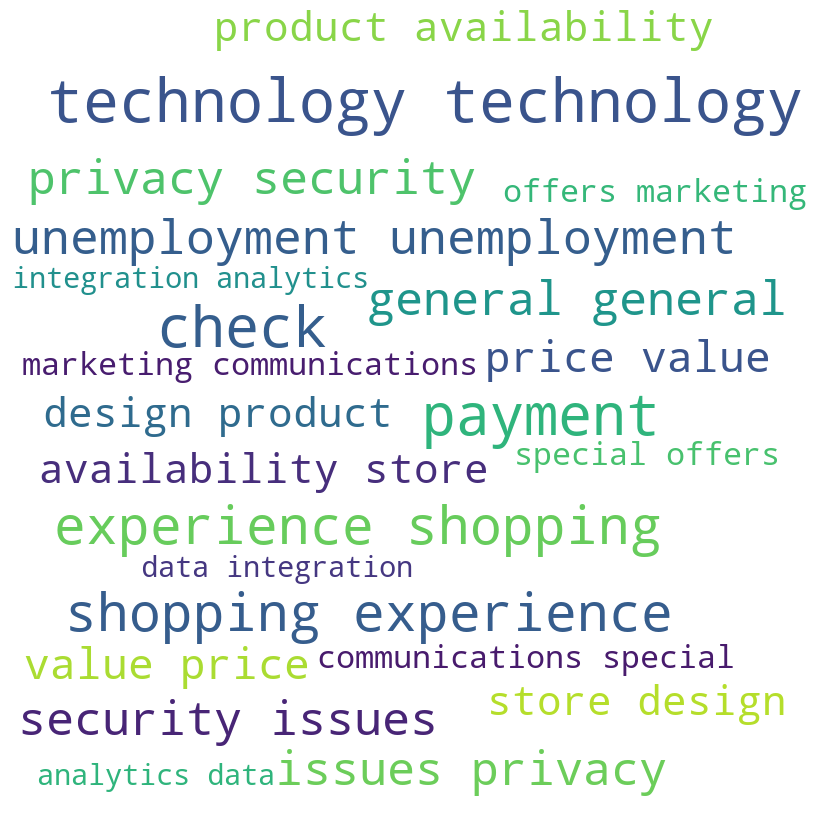

In [15]:
#circle wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ' '
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df1.aspect:
        
        # typecaste each val to string
        val = str(val)
        
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
            
        comment_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [16]:
#export the data to csv file
# df.to_csv('DataAfterSentimentAnalysis.csv')